In [1]:
from reservoirUtils import *
%load_ext autoreload
%autoreload 2

In [7]:
t = np.arange(20*1000)*0.001 #4 seconds at millisecond resolution
f = 1#Hz  
desiredOutput = 0.5*np.sin(2*np.pi*1*f*t) + 0.5*np.sin(2*np.pi*2*f*t)

reservoirs = {}
hyperparams = defaultHyperparams
hyperparams['sigma'] = 0
hyperparams['alpha'] = 1
print(hyperparams)


g_res_list = [0.5,1,1.5]
for (i,g_res) in enumerate(g_res_list):
    hyperparams['g_res'] = g_res
    reservoir = Reservoir(hyperparams)
    reservoirs[i] = []
    for _ in range(3*1000):
        reservoirs[i].append(reservoir.runDynamicsStep(returnItems=['z'])['z'])
    for j in range(14*1000):
        reservoirs[i].append(reservoir.runDynamicsStep(returnItems=['z'])['z'])
        reservoir.runTrainingStep(desiredOutput[j])
    for _ in range(3*1000):
        reservoirs[i].append(reservoir.runDynamicsStep(returnItems=['z'])['z'])

{'Nres': 300, 'Nz': 1, 'Nin': 26, 'Nres_in': 300, 'Nres_out': 300, 'p': 0.8, 'ipr': 1, 'dt': 1, 'tau': 10, 'alpha': 1, 'g_res': 1.5, 'g_FB': 1, 'sigma': 0}


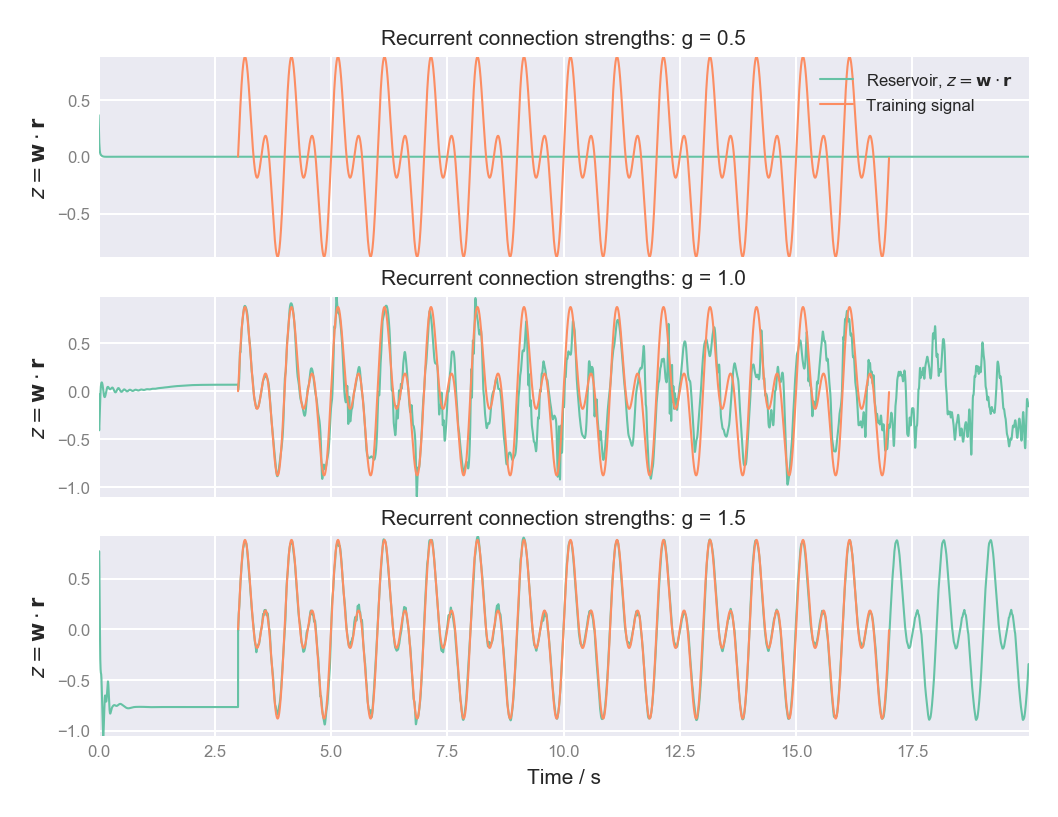

In [8]:
fig,ax = plt.subplots(3,1,figsize=(4,3), sharex=True)
for r in range(3):
    ax[r].plot(t,reservoirs[r],label=r'Reservoir, $z = \mathbf{w} \cdot \mathbf{r}$')
    ax[r].plot(t[3*1000:17*1000],desiredOutput[0*1000:14*1000],label='Training signal')
    if r == 2: 
        ax[r].set_xlabel('Time / s')
    if r == 0:   
        ax[r].legend()
    ax[r].set_ylabel(r'$z = \mathbf{w} \cdot \mathbf{r}$')
    ax[r].set_title("Recurrent connection strengths: g = %.1f" %g_res_list[r] )